In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.datasets import fetch_california_housing
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\victo\AppData\Local\Temp\ipykernel_2780\695744197.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Text(0, 0.5, 'y')

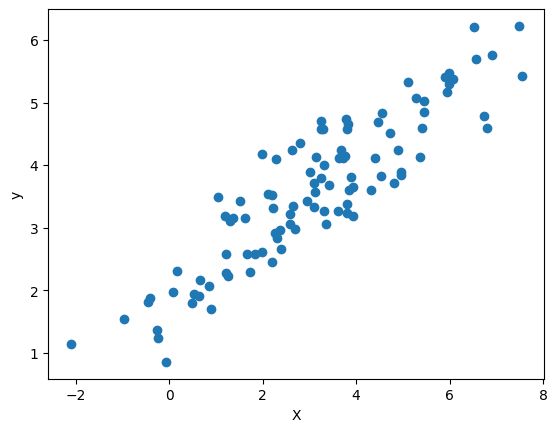

In [3]:
np.random.seed(0)
X = 2 * np.random.randn(100) + 3   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.5 * X + res                  # Actual values of Y

plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

---

# Exercise 1
1. Write a code that uses following formulas to calculate the parameters of linear regression. Use the data provided above.

$y = mx+c$

$m=\frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$c = \bar{y} - m\bar{x}$

2. Plot the regression line on the scatter plot

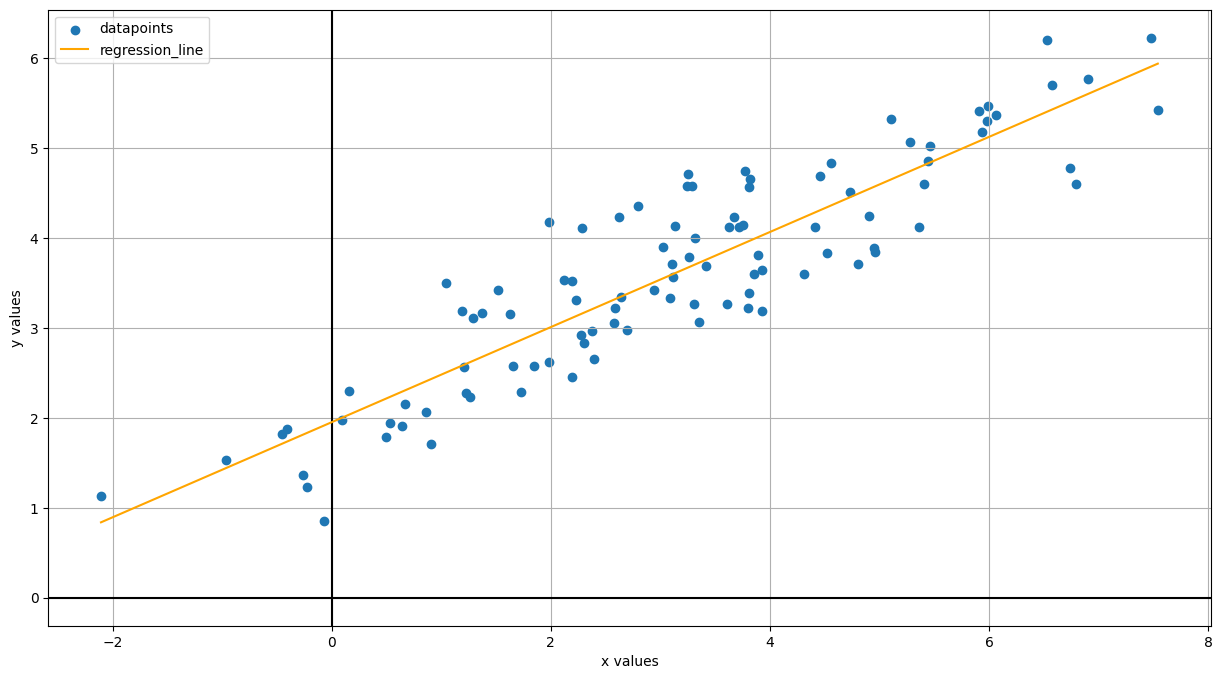

In [4]:
#Anwser exercise 1.1

def linear_regression(x, y):

    x_plot = np.linspace(np.min(x), np.max(x), len(x))

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    delta_x = x - x_mean
    delta_y = y - y_mean

    m = np.sum(delta_x * delta_y) / np.sum(delta_x**2)
    c = y_mean - m*x_mean

    y_pred = m*x_plot + c
    return x_plot, y_pred


#Anwser exercise 1.2
x_plot, y_pred = linear_regression(X, y)

plt.figure(figsize=(15,8))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid()

plt.scatter(X, y, label='datapoints')
plt.plot(x_plot, y_pred, c='orange', label='regression_line')

plt.legend()
plt.show()
plt.show()


---

# Linear regression with scikit learn

In [5]:
lm = LinearRegression()
X = X.reshape(-1,1)
model = lm.fit(X, y)

In [6]:
print(f'm is {model.coef_[0]}')
print(f'c is {model.intercept_}')

m is 0.5286746083865951
c is 1.9515527173664724


In [7]:
ypred = model.predict(X)

In [8]:
mean_absolute_error(y,ypred)

0.4329695692523386

---

# Polynomial regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = Pipeline([
  ('poly', PolynomialFeatures(degree=6)),
  ('linear', LinearRegression(fit_intercept=True))
])

In [10]:
model.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6)),
                ('linear', LinearRegression())])

In [11]:
ypred_poly = model.predict(X)

In [12]:
mean_absolute_error(y,ypred_poly)

0.42432783677576613

---

# California housing dataset

In [13]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [14]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [15]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
indices = np.random.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

In [17]:
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

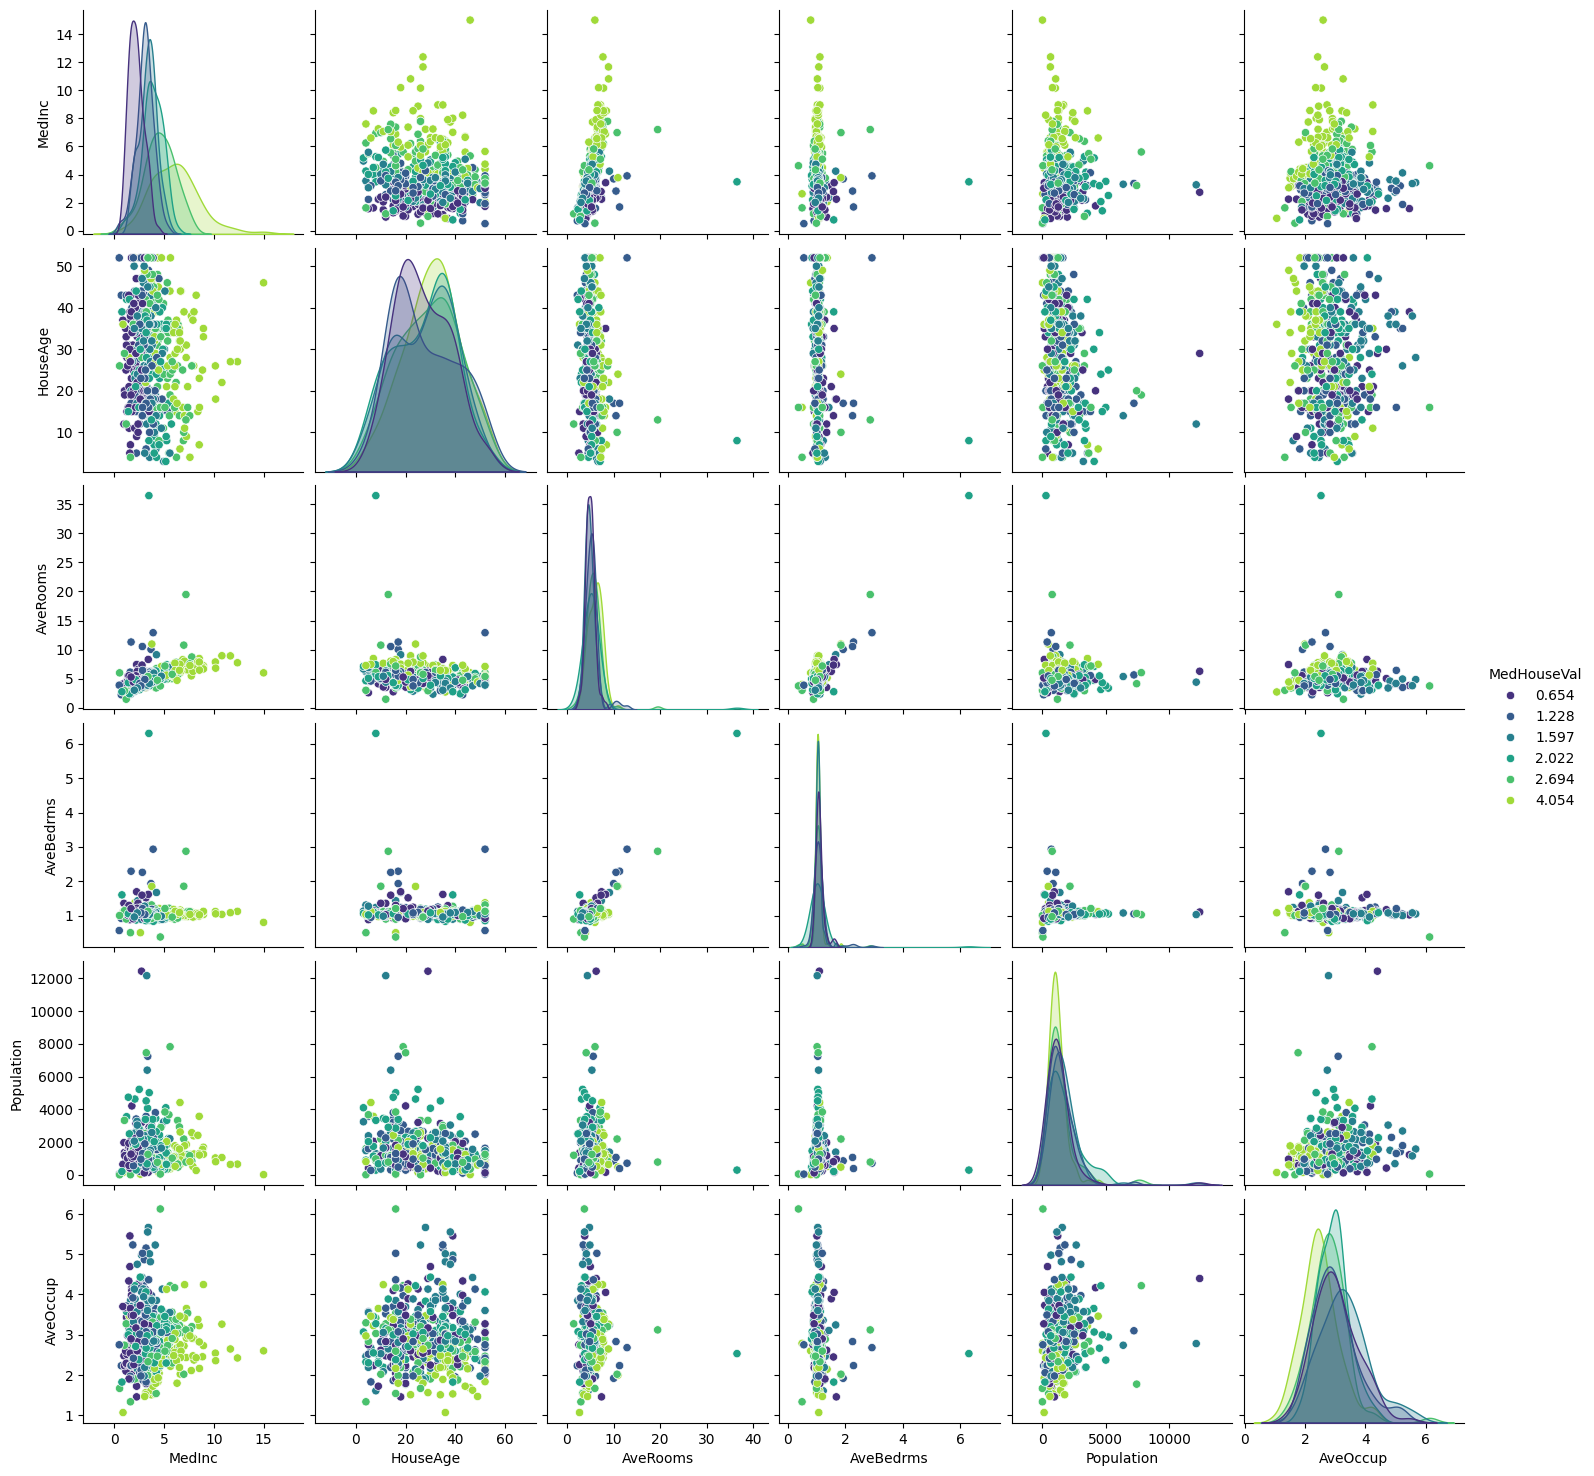

In [18]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

---

# Exercise 2
1. Given the pair plot, which two different features are best suited to apply linear regression? Perform linear regression on the selected 2 features.

2. Separate the dataset into train and test, with 70% for train and 30% for test. Apply regression with multiple features to predict "MedHouseVal" as the target variable. Report the mean absolute error on both train and test. (you can use scikit learn)

for more information on how to use Scikit learn linear regression, refer to the following link

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
#Anwser exersice 2.1 
features = ['AveRooms', 'AveBedrms']
target = 'MedHouseVal'

selected_features = subset[features]
selected_target = subset[target]

selected_features_np = np.array(selected_features)
selected_target_np = np.array(selected_target)

lin_model = LinearRegression()
model = lin_model.fit(selected_features_np, selected_target_np)
prediction = model.predict(selected_features_np)

print(f'The error is = {mean_absolute_error(selected_target_np, prediction)}')

The error is = 0.8116696635785782


In [20]:
#Anwser 2.2
x_train, x_test, y_train, y_test = train_test_split(subset.loc[:, subset.columns != target], subset[target], test_size=0.3, random_state=42)

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

model = lin_model.fit(x_train_np, y_train_np)
prediction1 = model.predict(x_test_np)
prediction2 = model.predict(x_train_np)

print(f'The error with respect to y_test_np is = {mean_absolute_error(y_test, prediction1)}')
print(f'The error with respect to y_train_np is = {mean_absolute_error(y_train, prediction2)}')

The error with respect to y_test_np is = 0.5546721643574558
The error with respect to y_train_np is = 0.5931996759026709


---

# Exercise 3

1. Use polynomial regression with multiple features to predict "MedHouseVal" as the target variable. Iterate through polynomial degrees from 1 to 10. 

2. Plot both train and test errors per polynomial degree.

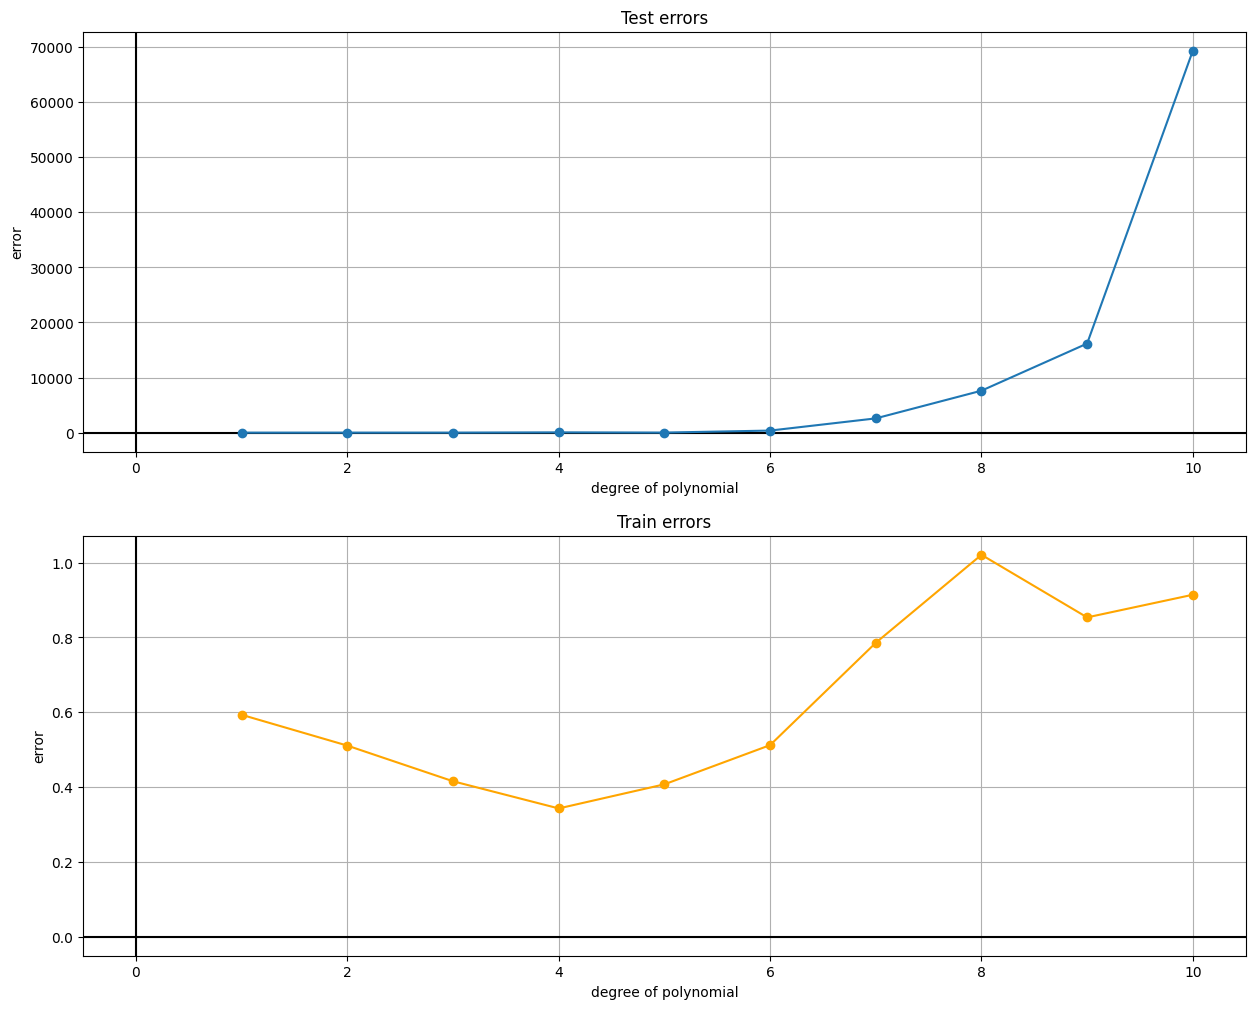

In [25]:
#Anwser exersice 3.1
num_degrees = 10

test_errors = []
train_errors = []
x_vals = []

for i in range(1, num_degrees+1):
    model = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression(fit_intercept=True))])
    model.fit(x_train_np, y_train_np)

    test_predict = model.predict(x_test_np)
    test_error = mean_absolute_error(y_test_np, test_predict)
    test_errors.append(test_error)

    train_predict = model.predict(x_train_np)
    train_error = mean_absolute_error(y_train_np, train_predict)
    train_errors.append(train_error)

    x_vals.append(i)

test_errors_np = np.array(test_errors)
train_errors_np = np.array(train_errors)
x_vals_np = np.array(x_vals)

#Anwser exersice 3.2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

ax1.axvline(x=0, c='black')
ax1.axhline(y=0, c='black')
ax1.set_xlabel('degree of polynomial')
ax1.set_ylabel('error')
ax1.grid()
ax1.plot(x_vals_np, test_errors_np, marker='o')
ax1.set_title(label='Test errors') 

ax2.axvline(x=0, c='black')
ax2.axhline(y=0, c='black')
ax2.set_xlabel('degree of polynomial')
ax2.set_ylabel('error')
ax2.grid()
ax2.plot(x_vals_np, train_errors_np, marker='o', c='orange')
ax2.set_title(label='Train errors') 

plt.show()